# aSPEM Experiment : analysis




In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import scipy as sc
from scipy import stats
from scipy.stats import beta

TODO: inclure une réinitialisation à cahque pause en considérant chaque s-ous bloc comme des blocs indép

In [2]:
%matplotlib inline
fig_width = 15

from aSPEM import aSPEM
import bayesianchangepoint as bcp

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    #print(a)

In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM', 'BMC', 'CS', 'DC', 'FM', 'LB', 'OP','RS', 'TN', 'YK'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

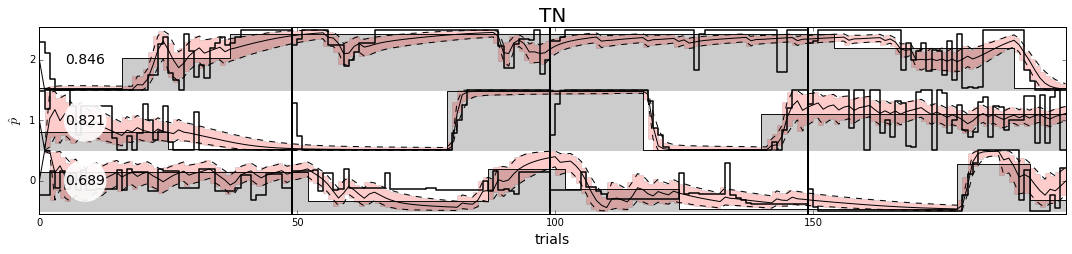

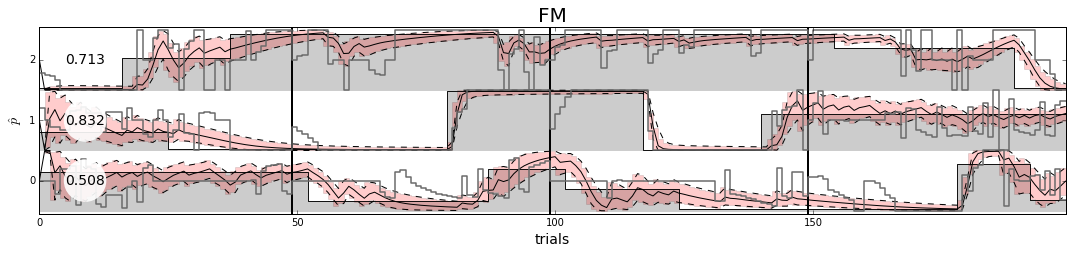

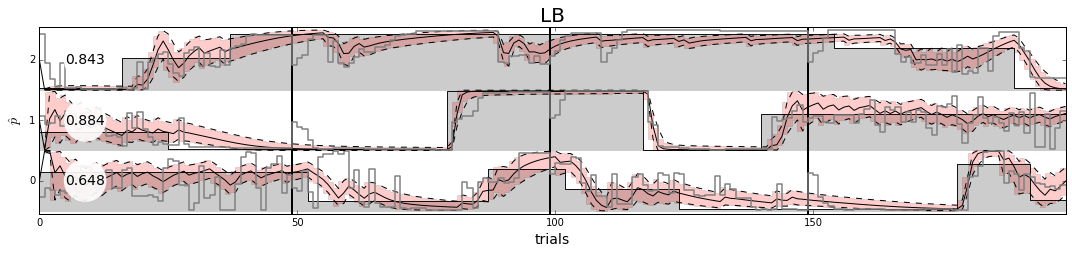

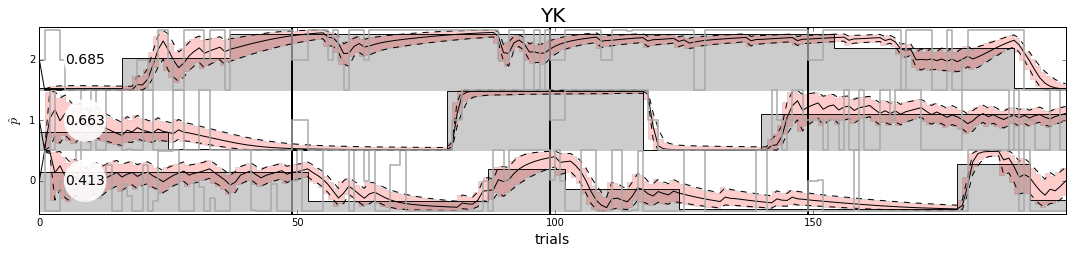

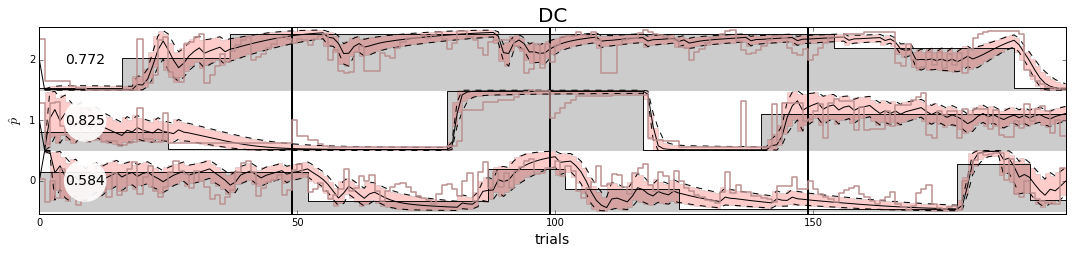

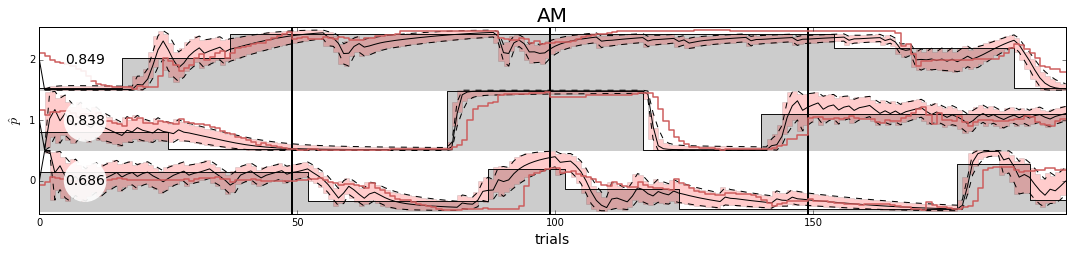

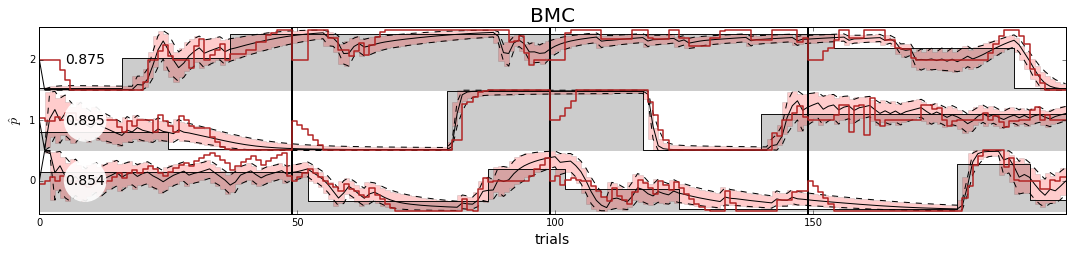

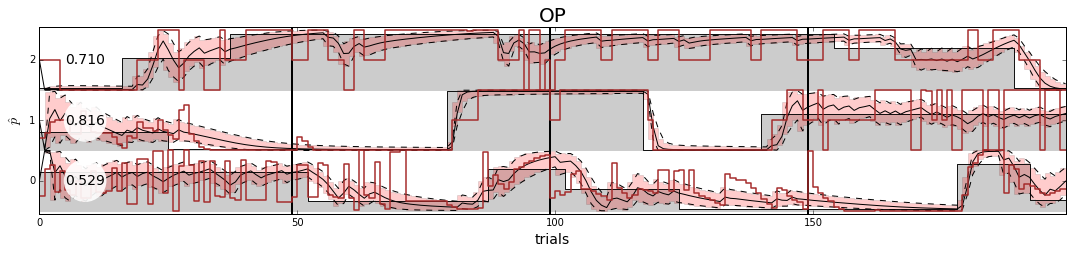

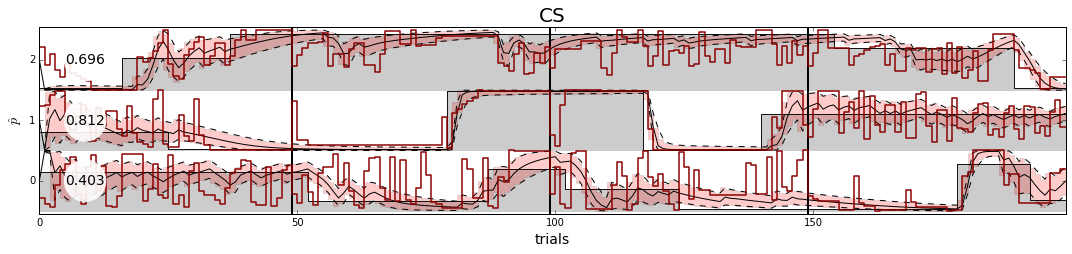

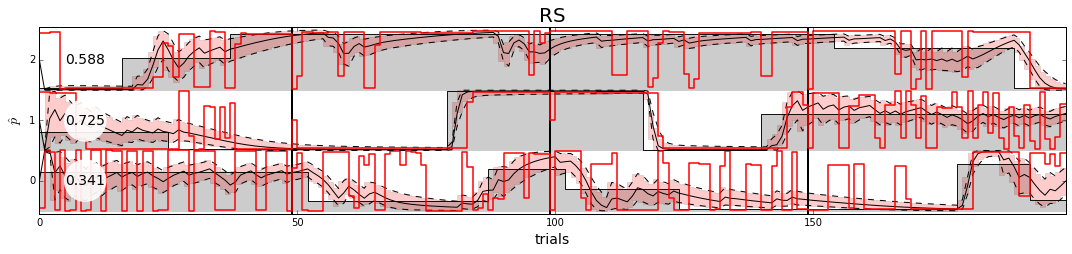

In [5]:
for x, color in enumerate(['black', 'dimgrey', 'grey','darkgrey', 'rosybrown', 'indianred', 'firebrick', 'brown', 'darkred', 'red']):

    fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width/(1.6180*3)))
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau 
    
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    
    axs.step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.9)
    axs.axis('tight')
    axs.set_yticks(np.arange(N_blocks)+.5)
    axs.set_yticklabels(np.arange(N_blocks) )
    axs.set_ylabel(r'$\^p$', fontsize=14)
    axs.bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs.bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs.bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    
    for block in range(N_blocks):
        axs.fill_between(range(N_trials), block + np.zeros_like(p[:, block, 1]), block + p[:, block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
        
        
        #----------------------------------------------------
        p_bar, r, beliefs = bcp.inference(p[:, block, 0], h=h, p0=.5)
        p_hat, r_hat = bcp.readout(p_bar, r, beliefs)
        p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
        for i_trial in range(N_trials):
            p_low[i_trial], p_sup[i_trial] = beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial], b=(1-p_hat[i_trial])*r_hat[i_trial])

        axs.plot(range(N_trials), block + p_hat, c='k',  lw=1)
        axs.plot(range(N_trials), block + p_sup, 'k--', lw=1)
        axs.plot(range(N_trials), block + p_low, 'k--', lw=1)
        
        axs.fill_between(range(N_trials), block + p_sup, block + p_low, lw=.5, alpha=.2, facecolor='red', step='pre')
        
        #----------------------------------------------------
        axs.step(range(N_trials), block + results[:, block],  color=color, lw=1.5)
        axs.text(5, block+(1/2), '%0.3f'%( np.corrcoef(results[:, block], p_hat)[0][1]), color='k',bbox={'fc':'white', 'alpha':0.9,'lw':0, 'pad':0.1, 'boxstyle':'circle'},va='center', ha='left', fontsize=14)

    
    fig.tight_layout()
    axs.set_ylim(-.05, N_blocks + .05)
    axs.set_xlabel('trials', fontsize=14)
    axs.set_title('%s'%(exp[x]['observer']), fontsize=20)

plt.show()

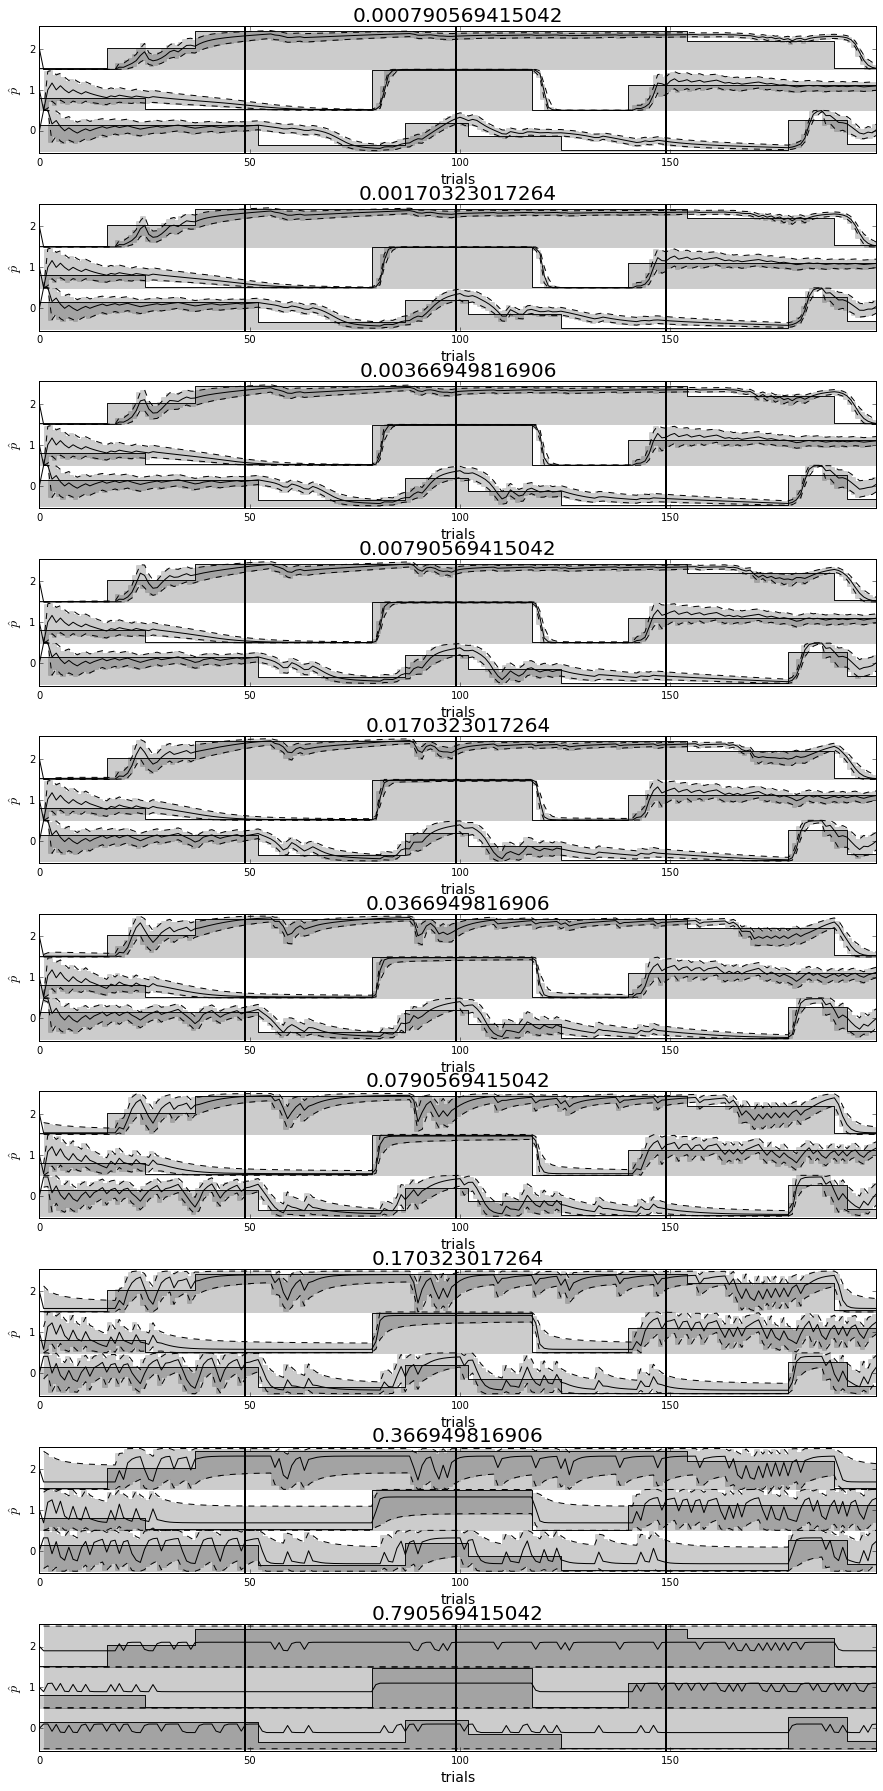

In [6]:
fig, axs = plt.subplots(10, 1, figsize=(fig_width, (10*fig_width)/(1.6180*3)))
plt.subplots_adjust(hspace=0.4) 

h = 1./tau 
hs = h*np.logspace(-1.5, 1.5, 10)
for x in range(len(hs)):
    
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    
    axs[x].step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.9)
    axs[x].axis('tight')
    axs[x].set_yticks(np.arange(N_blocks)+.5)
    axs[x].set_yticklabels(np.arange(N_blocks) )
    axs[x].set_ylabel(r'$\^p$', fontsize=14)
    axs[x].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    
    for block in range(N_blocks):
        axs[x].fill_between(range(N_trials), block + np.zeros_like(p[:, block, 1]), block + p[:, block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
        
        p_bar, r, beliefs = bcp.inference(p[:, block, 0], h=hs[x], p0=.5)
        p_hat, r_hat = bcp.readout(p_bar, r, beliefs)
        p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
        for i_trial in range(N_trials):
            p_low[i_trial], p_sup[i_trial] = beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial], b=(1-p_hat[i_trial])*r_hat[i_trial])

        axs[x].plot(range(N_trials), block + p_hat, c='k',  lw=1)
        axs[x].plot(range(N_trials), block + p_sup, 'k--', lw=1)
        axs[x].plot(range(N_trials), block + p_low, 'k--', lw=1)

        axs[x].fill_between(range(N_trials), block + p_sup, block + p_low, lw=.5, alpha=.2, facecolor='k', step='pre')   

    axs[x].set_ylim(-.05, N_blocks + .05)
    axs[x].set_xlabel('trials', fontsize=14)
    axs[x].set_title('%s'%(hs[x]), fontsize=20)

plt.show()

TODO: essayer avec les deux modes de readout pour voir si un est mieux que l'autre

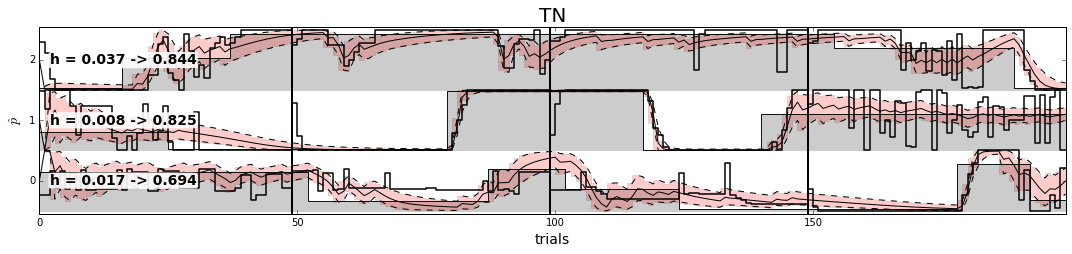

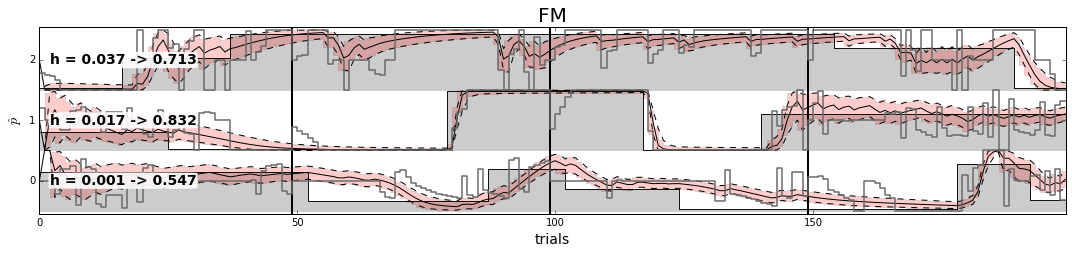

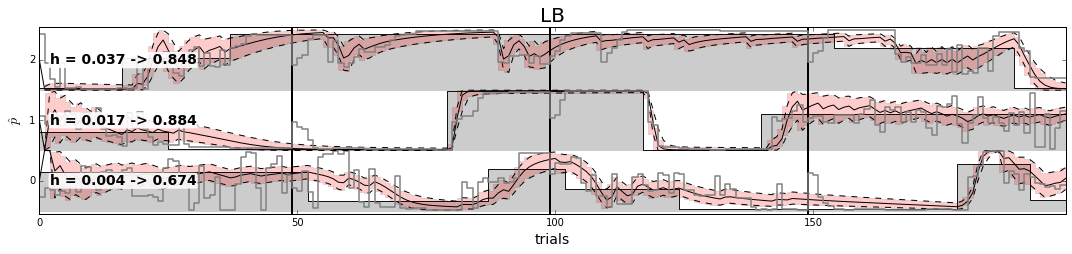

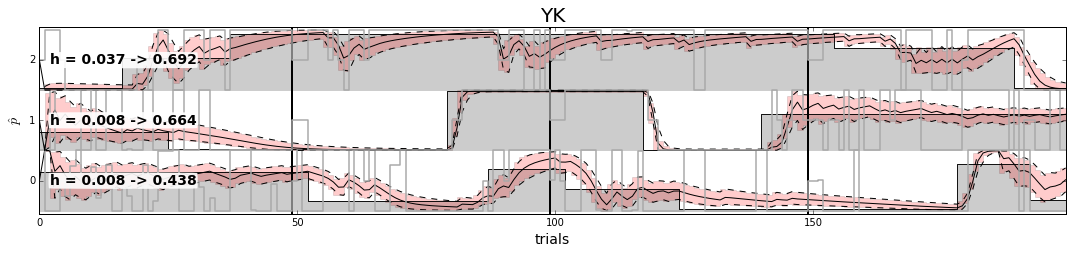

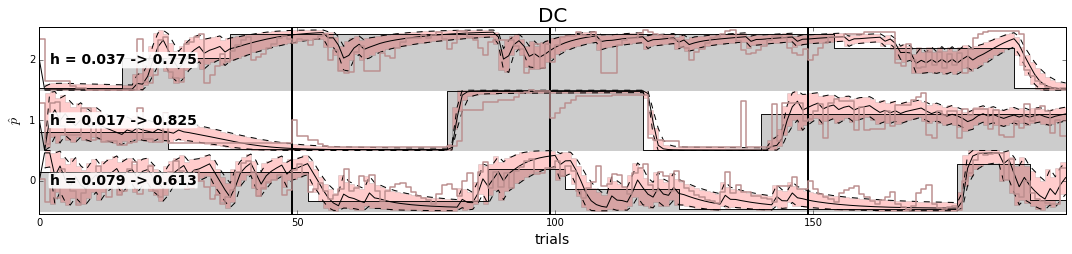

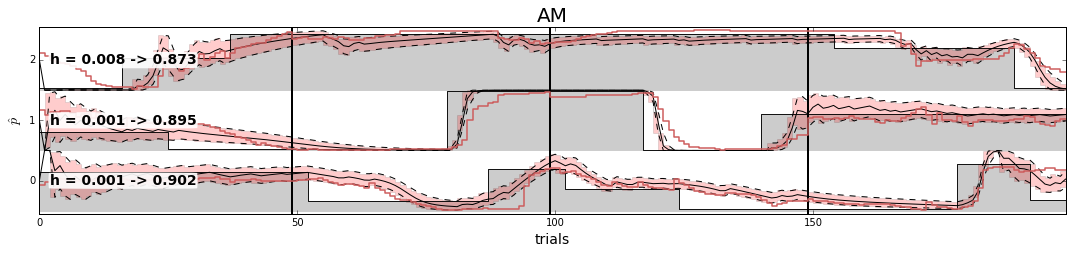

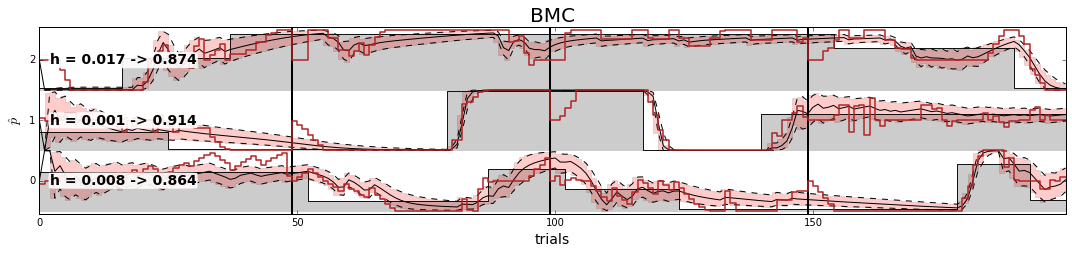

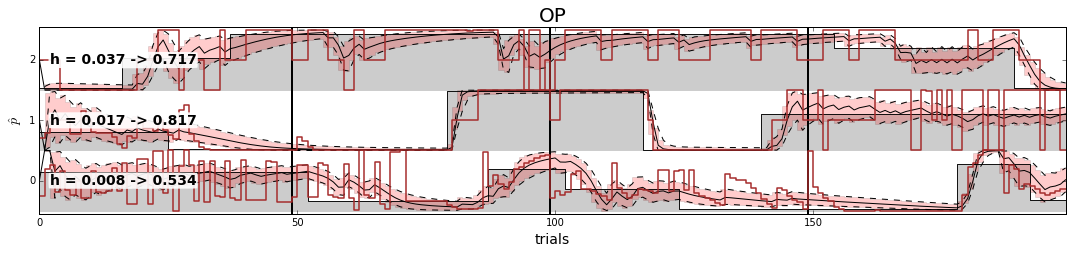

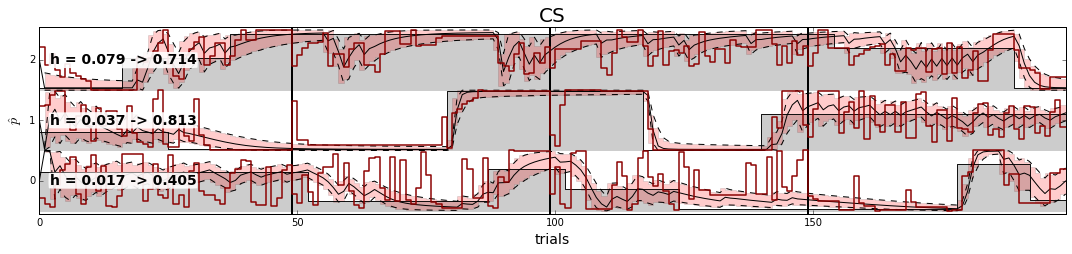

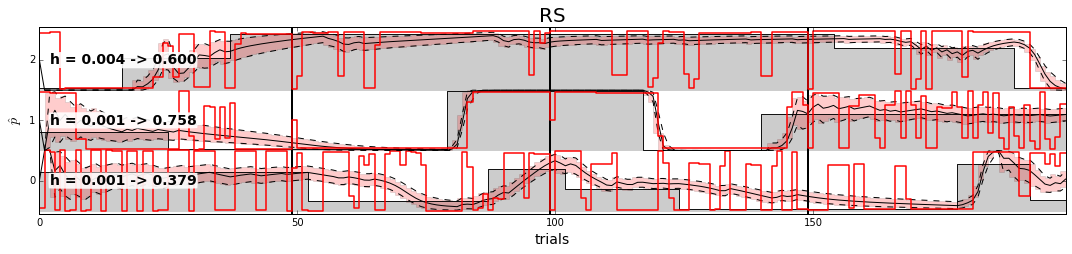

In [7]:
for x, color in enumerate(['black', 'dimgrey', 'grey','darkgrey', 'rosybrown', 'indianred', 'firebrick', 'brown', 'darkred', 'red']):

    fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width/(1.6180*3)))
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau 
    hs = h*np.logspace(-1.5, 1.5, 10)
    
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    
    axs.step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.9)
    axs.axis('tight')
    axs.set_yticks(np.arange(N_blocks)+.5)
    axs.set_yticklabels(np.arange(N_blocks) )
    axs.set_ylabel(r'$\^p$', fontsize=14)
    axs.bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs.bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs.bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    
    for block in range(N_blocks):
        axs.fill_between(range(N_trials), block + np.zeros_like(p[:, block, 1]), block + p[:, block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
        coef = np.ndarray(10)
        #colo = ['black', 'r', 'y','g', 'b', 'darkred', 'grey', 'c', 'm', 'brown']
        for H in range(len(hs)):
            #----------------------------------------------------
            p_bar, r, beliefs = bcp.inference(p[:, block, 0], h=hs[H], p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r, beliefs)
            coef[H] = np.corrcoef(results[:, block], p_hat)[0][1]
        
        tutu = coef.argmax()
        p_bar, r, beliefs = bcp.inference(p[:, block, 0], h=hs[tutu], p0=.5)
        p_hat, r_hat = bcp.readout(p_bar, r, beliefs)
        p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
        for i_trial in range(N_trials):
            p_low[i_trial], p_sup[i_trial] = beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial], b=(1-p_hat[i_trial])*r_hat[i_trial])

        axs.plot(range(N_trials), block + p_hat, c='k',  lw=1)
        axs.plot(range(N_trials), block + p_sup, 'k--', lw=1)
        axs.plot(range(N_trials), block + p_low, 'k--', lw=1)

        axs.fill_between(range(N_trials), block + p_sup, block + p_low, lw=.5, alpha=.2, facecolor='r', step='pre')
        axs.text(2, block+(1/2), 'h = %0.3f -> %0.3f'%(hs[tutu], np.corrcoef(results[:, block], p_hat)[0][1]), color='k', weight='bold',bbox={'fc':'white', 'alpha':0.9,'lw':0, 'pad':0.1, 'boxstyle':'round4'},va='center', ha='left', fontsize=14)
            
        #----------------------------------------------------
        axs.step(range(N_trials), block + results[:, block],  color=color, lw=1.5)
        
    
    fig.tight_layout()
    axs.set_ylim(-.05, N_blocks + .05)
    axs.set_xlabel('trials', fontsize=14)
    axs.set_title('%s'%(exp[x]['observer']), fontsize=20)

    plt.show()